In [1]:
import pandas as pd
import numpy as np

import os, sys
# Adding parent directory to python path
sys.path.append(os.path.dirname(os.getcwd()))

import ml_workflow
from ml_workflow.rule import Rule

import sqlite3

Personnal data csv file


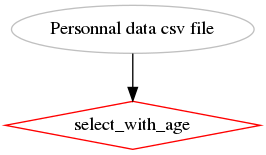

In [2]:
@ml_workflow.mlwf_data_source(name='Personnal data csv file')
def retrieve_personnal_data():
    return pd.read_csv('data/train.csv')

@ml_workflow.mlwf_data_source()
def retrieve_pcr_tests():
    pass

@ml_workflow.mlwf_data_source()
def retrieve_visites():
    pass

def get_patients_status():
    personnal_df = retrieve_personnal_data()
    print(personnal_df.ml_workflow_current_node.origin)
    with Rule(name='select_with_age', highlight=2):
        personnal_df = personnal_df[np.logical_not(personnal_df['Age'].isna())]
        
    return personnal_df

df = get_patients_status()
df.plot_model('graph.png')

In [3]:
import os
print(os.getcwd())
os.listdir('data')

/home/nicolas/AP_HP/ml_workflow/example


['extra_data.db', 'train.csv']